## Pretrained CNN: *transfer learning*

Nature article: [Dermatologist-level classification of skin cancer with deep neural networks](http://www.nature.com/nature/journal/v542/n7639/full/nature21056.html)

In [1]:
import dogs_vs_cats as dvc
all_files = dvc.image_files()

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 960M (CNMeM is disabled, cuDNN 5105)


data file train.zip has already been downloaded
Data has already been extracted


## Imagenet pretrained models
Documentation from: https://keras.io/applications/. In `keras.applications` namespace we have the latest top accuracy solutions of imagenet 2012 classification contest.

In [2]:
disable_optimization_theano = False
if disable_optimization_theano:
    import theano
    theano.config.optimizer = "None"


In [3]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# https://keras.io/applications/#vgg16
model = VGG16(weights='imagenet')

input_image_shape = (3,224,224)
img_path = all_files[10]
img = image.load_img(img_path, target_size=input_image_shape[1:])
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)

In [4]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 224, 224)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 224, 224)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 224, 224)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 112, 112)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

Imagenet 1000 classes:
* http://image-net.org/explore

In [5]:
# (one such list for each sample in the batch)

print('Predicted:', decode_predictions(preds, top=5))

Predicted: [[('n02124075', 'Egyptian_cat', 0.15671857), ('n15075141', 'toilet_tissue', 0.10072913), ('n04209239', 'shower_curtain', 0.085384056), ('n04493381', 'tub', 0.064990662), ('n02808440', 'bathtub', 0.063053794)]]


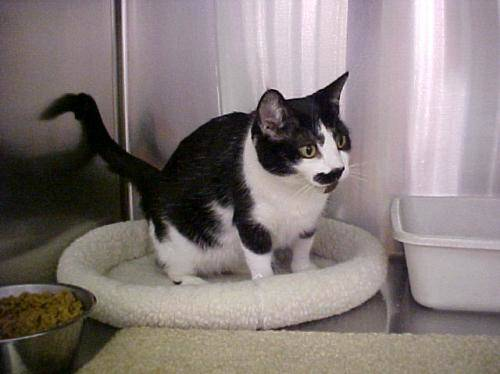

In [6]:
from IPython.display import Image
Image(img_path)

In [7]:
print(preds.shape)

(1, 1000)


In [8]:
from keras.applications.imagenet_utils import CLASS_INDEX
# Imagenet 1000 classes
CLASS_INDEX

{'757': ['n04065272', 'recreational_vehicle'],
 '616': ['n03627232', 'knot'],
 '154': ['n02086079', 'Pekinese'],
 '498': ['n03032252', 'cinema'],
 '703': ['n03891251', 'park_bench'],
 '63': ['n01748264', 'Indian_cobra'],
 '521': ['n03133878', 'Crock_Pot'],
 '666': ['n03786901', 'mortar'],
 '337': ['n02363005', 'beaver'],
 '794': ['n04209239', 'shower_curtain'],
 '874': ['n04487081', 'trolleybus'],
 '821': ['n04311004', 'steel_arch_bridge'],
 '165': ['n02089078', 'black-and-tan_coonhound'],
 '374': ['n02488291', 'langur'],
 '241': ['n02108000', 'EntleBucher'],
 '75': ['n01774384', 'black_widow'],
 '958': ['n07802026', 'hay'],
 '938': ['n07715103', 'cauliflower'],
 '829': ['n04335435', 'streetcar'],
 '506': ['n03065424', 'coil'],
 '229': ['n02105641', 'Old_English_sheepdog'],
 '682': ['n03837869', 'obelisk'],
 '65': ['n01751748', 'sea_snake'],
 '225': ['n02105162', 'malinois'],
 '735': ['n03980874', 'poncho'],
 '939': ['n07716358', 'zucchini'],
 '929': ['n07615774', 'ice_lolly'],
 '976':

In [9]:
# predict a set of images
n_images = 10
x = np.ndarray((n_images,3,224,224))
for i,img_path in enumerate(all_files[0:n_images]):
    img = image.load_img(img_path, target_size=(224, 224))
    x[i] = image.img_to_array(img)

# preprocess and predict all together
x_preprocessed = preprocess_input(x)
preds = model.predict(x_preprocessed,verbose=1)
print("")
print(preds.shape)
dec_preds = decode_predictions(preds,top=5)
dec_preds

10/10 [==============================] - 0s

(10, 1000)


[[('n02107908', 'Appenzeller', 0.80123764),
  ('n02105412', 'kelpie', 0.085341699),
  ('n02108000', 'EntleBucher', 0.072655067),
  ('n02107574', 'Greater_Swiss_Mountain_dog', 0.015249167),
  ('n02110806', 'basenji', 0.0052667703)],
 [('n02105162', 'malinois', 0.44564199),
  ('n02093991', 'Irish_terrier', 0.19172162),
  ('n02093754', 'Border_terrier', 0.14469863),
  ('n02098105', 'soft-coated_wheaten_terrier', 0.064860351),
  ('n02108422', 'bull_mastiff', 0.046709489)],
 [('n02123045', 'tabby', 0.21001889),
  ('n02124075', 'Egyptian_cat', 0.10940972),
  ('n02123159', 'tiger_cat', 0.085246019),
  ('n04026417', 'purse', 0.055465084),
  ('n03223299', 'doormat', 0.032872945)],
 [('n02099712', 'Labrador_retriever', 0.87004143),
  ('n02099601', 'golden_retriever', 0.050244406),
  ('n02088364', 'beagle', 0.024386188),
  ('n02088466', 'bloodhound', 0.012492337),
  ('n02088238', 'basset', 0.012246392)],
 [('n02089078', 'black-and-tan_coonhound', 0.7535525),
  ('n02088466', 'bloodhound', 0.162998

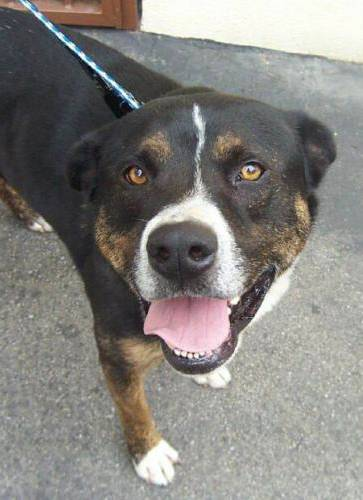

Appenzeller (prob: 0.801) kelpie (prob: 0.085) EntleBucher (prob: 0.073) Greater_Swiss_Mountain_dog (prob: 0.015) basenji (prob: 0.005)


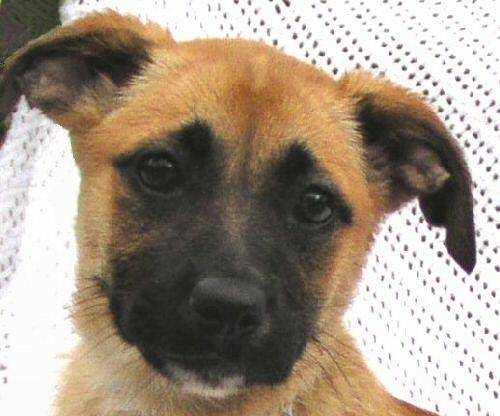

malinois (prob: 0.446) Irish_terrier (prob: 0.192) Border_terrier (prob: 0.145) soft-coated_wheaten_terrier (prob: 0.065) bull_mastiff (prob: 0.047)


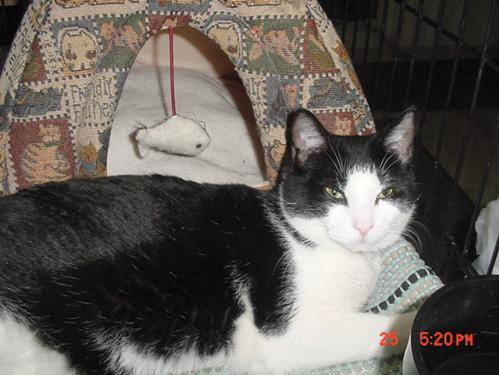

tabby (prob: 0.210) Egyptian_cat (prob: 0.109) tiger_cat (prob: 0.085) purse (prob: 0.055) doormat (prob: 0.033)


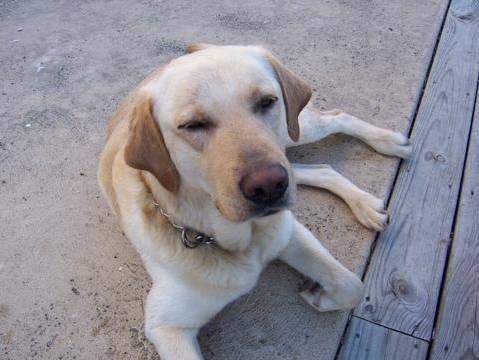

Labrador_retriever (prob: 0.870) golden_retriever (prob: 0.050) beagle (prob: 0.024) bloodhound (prob: 0.012) basset (prob: 0.012)


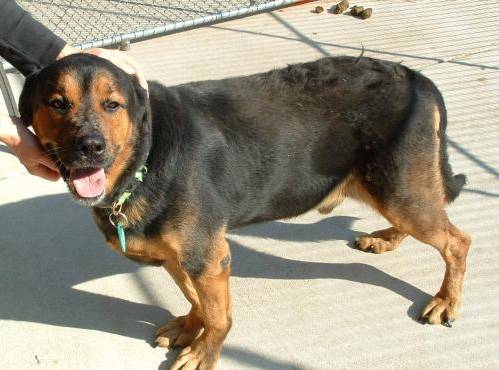

black-and-tan_coonhound (prob: 0.754) bloodhound (prob: 0.163) Doberman (prob: 0.026) redbone (prob: 0.021) miniature_pinscher (prob: 0.011)


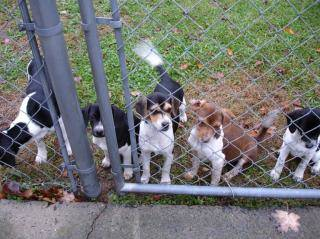

Walker_hound (prob: 0.138) English_springer (prob: 0.118) borzoi (prob: 0.096) Welsh_springer_spaniel (prob: 0.082) beagle (prob: 0.076)


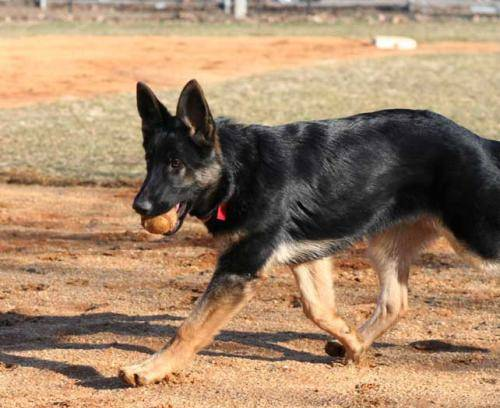

German_shepherd (prob: 0.859) kelpie (prob: 0.129) groenendael (prob: 0.009) Doberman (prob: 0.001) Border_collie (prob: 0.000)


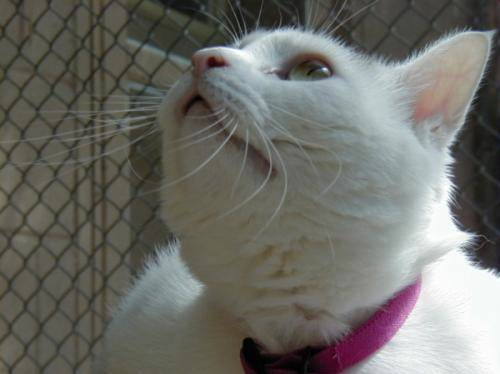

West_Highland_white_terrier (prob: 0.128) Egyptian_cat (prob: 0.074) space_heater (prob: 0.060) Chihuahua (prob: 0.051) Siamese_cat (prob: 0.050)


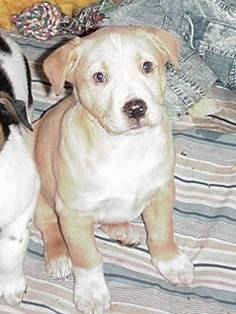

American_Staffordshire_terrier (prob: 0.408) Staffordshire_bullterrier (prob: 0.270) Greater_Swiss_Mountain_dog (prob: 0.063) Appenzeller (prob: 0.032) boxer (prob: 0.020)


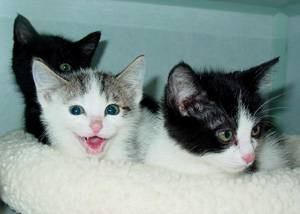

bucket (prob: 0.102) carton (prob: 0.085) bathtub (prob: 0.069) tub (prob: 0.064) Egyptian_cat (prob: 0.040)


In [10]:
from IPython.display import Image,display

for img_path,dec_pred in zip(all_files[0:n_images],dec_preds):
    display(Image(img_path,width="120px",height="120px"))
    print(" ".join(["%s (prob: %.3f)"%(elm[1],elm[2]) for elm in dec_pred]))

## Using pretrained CNN as *feature extractors*

In [11]:
# load model without top layer
n_images_train=500
n_images_test=500
input_image_shape = (3,224,224)
train_features, train_labels,train_files, \
test_features, test_labels, test_files = dvc.training_test_datasets(all_files,
                                                                    n_images_train,n_images_test,
                                                                    input_image_shape)

Loading train set
loading image (1/500)
loading image (101/500)
loading image (201/500)
loading image (301/500)
loading image (401/500)
Loading test set
loading image (1/500)
loading image (101/500)
loading image (201/500)
loading image (301/500)
loading image (401/500)


In [12]:
# load_img from keras.preprocessing loads the images in [0,255] scale
train_features*=255
test_features*=255
train_features = preprocess_input(train_features)
test_features = preprocess_input(test_features)

In [13]:
from keras.models import Model
base_model = VGG16(weights='imagenet')
model = Model(input=base_model.input, output=base_model.get_layer('fc2').output)

print("Predicting train images")
train_features_cnn = model.predict(train_features,verbose=1)
print("Predicting test images")
test_features_cnn = model.predict(test_features,verbose=1)

Predicting train images
500/500 [==============================] - 14s     
Predicting test images
500/500 [==============================] - 14s     

In [14]:
train_features_cnn.shape

(500, 4096)

In [15]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'kernel': ['linear'],
                     'C': [1, 10, 100, 1000]}

clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5,n_jobs=7)
clf.fit(train_features_cnn, train_labels)

clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
print("Train score: {}".format(clf.score(train_features_cnn,train_labels)))
print("Test score: {}".format(clf.score(test_features_cnn,test_labels)))

Train score: 1.0
Test score: 0.994


## *Fine tune* CNN model
With fine tunning here we refer to the process of training the same CNN architecture:
* Using the weights of the *transfered* task (here imagenet classification) as starting points in sgd.
* We let some layers to be *fixed* (i.e. not updating the parameters of them).

In [17]:
if base_model is None:
    base_model = VGG16(weights='imagenet')

model_conv_vgg = Model(input=base_model.input, output=base_model.get_layer('flatten').output)

train_features_convs = model_conv_vgg.predict(train_features,verbose=1)

500/500 [==============================] - 14s     


In [18]:
model_conv_vgg.output_shape

(None, 25088)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dense

model_fc_vgg = Sequential([
    Dense(4096, activation='relu', name='fc1',input_dim=train_features_convs.shape[1]),
    Dense(4096, activation='relu', name='fc2'),
    Dense(1, activation='sigmoid', name='predictions_new')
])

# Copy to weights to have them as an initialization
model_fc_vgg.get_layer('fc1').set_weights([w for w in base_model.get_layer("fc1").get_weights()])
model_fc_vgg.get_layer('fc2').set_weights([w for w in base_model.get_layer("fc2").get_weights()])
model_fc_vgg.get_layer('fc1').trainable = False
model_fc_vgg.get_layer('fc2').trainable = True

In [20]:
model_fc_vgg.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
fc1 (Dense)                      (None, 4096)          102764544   dense_input_1[0][0]              
____________________________________________________________________________________________________
fc2 (Dense)                      (None, 4096)          16781312    fc1[0][0]                        
____________________________________________________________________________________________________
predictions_new (Dense)          (None, 1)             4097        fc2[0][0]                        
Total params: 119,549,953
Trainable params: 16,785,409
Non-trainable params: 102,764,544
____________________________________________________________________________________________________


In [21]:
model_fc_vgg.compile(optimizer="adam", 
                     loss='binary_crossentropy',metrics=['accuracy'])

nb_epoch=80
print("Model compiled, start training")
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, 
                                        verbose=0, mode='auto')
history = model_fc_vgg.fit(train_features_convs,
                           train_labels,validation_split=.1,
                           batch_size=32, nb_epoch=nb_epoch,verbose=2,callbacks=[early_stopping_callback])

Model compiled, start training
Train on 450 samples, validate on 50 samples
Epoch 1/80
0s - loss: 1.0535 - acc: 0.8844 - val_loss: 0.3224 - val_acc: 0.9800
Epoch 2/80
0s - loss: 0.5959 - acc: 0.9600 - val_loss: 0.3432 - val_acc: 0.9600
Epoch 3/80
0s - loss: 0.3182 - acc: 0.9800 - val_loss: 0.3188 - val_acc: 0.9800
Epoch 4/80
0s - loss: 0.3351 - acc: 0.9778 - val_loss: 0.6447 - val_acc: 0.9600
Epoch 5/80
0s - loss: 0.6023 - acc: 0.9622 - val_loss: 0.3995 - val_acc: 0.9600
Epoch 6/80
0s - loss: 0.4462 - acc: 0.9711 - val_loss: 0.8977 - val_acc: 0.9400
Epoch 7/80
0s - loss: 0.6682 - acc: 0.9511 - val_loss: 1.2894 - val_acc: 0.9200
Epoch 8/80
0s - loss: 0.8043 - acc: 0.9467 - val_loss: 0.6377 - val_acc: 0.9600
Epoch 9/80
0s - loss: 0.8855 - acc: 0.9422 - val_loss: 1.9131 - val_acc: 0.8800


In [23]:
test_features_convs = model_conv_vgg.predict(test_features,verbose=1)

MemoryError: Error allocating 411041792 bytes of device memory (out of memory).
Apply node that caused the error: GpuAllocEmpty(Assert{msg='The convolution would produce an invalid shape (dim[0] < 0).'}.0, Assert{msg='The convolution would produce an invalid shape (dim[1] < 0).'}.0, Assert{msg='The convolution would produce an invalid shape (dim[2] <= 0).'}.0, Assert{msg='The convolution would produce an invalid shape (dim[3] <= 0).'}.0)
Toposort index: 233
Inputs types: [TensorType(int64, scalar), TensorType(int64, scalar), TensorType(int64, scalar), TensorType(int64, scalar)]
Inputs shapes: [(), (), (), ()]
Inputs strides: [(), (), (), ()]
Inputs values: [array(32), array(64), array(224), array(224)]
Outputs clients: [[GpuDnnConv{algo='small', inplace=True}(GpuContiguous.0, GpuContiguous.0, GpuAllocEmpty.0, GpuDnnConvDesc{border_mode='half', subsample=(1, 1), conv_mode='conv', precision='float32'}.0, Constant{1.0}, Constant{0.0})]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [22]:
results = model_fc_vgg.evaluate(test_features_convs,test_labels)

MemoryError: Error allocating 411041792 bytes of device memory (out of memory).
Apply node that caused the error: GpuAllocEmpty(Assert{msg='The convolution would produce an invalid shape (dim[0] < 0).'}.0, Assert{msg='The convolution would produce an invalid shape (dim[1] < 0).'}.0, Assert{msg='The convolution would produce an invalid shape (dim[2] <= 0).'}.0, Assert{msg='The convolution would produce an invalid shape (dim[3] <= 0).'}.0)
Toposort index: 237
Inputs types: [TensorType(int64, scalar), TensorType(int64, scalar), TensorType(int64, scalar), TensorType(int64, scalar)]
Inputs shapes: [(), (), (), ()]
Inputs strides: [(), (), (), ()]
Inputs values: [array(32), array(64), array(224), array(224)]
Outputs clients: [[GpuDnnConv{algo='small', inplace=True}(GpuContiguous.0, GpuContiguous.0, GpuAllocEmpty.0, GpuDnnConvDesc{border_mode='half', subsample=(1, 1), conv_mode='conv', precision='float32'}.0, Constant{1.0}, Constant{0.0})]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [ ]:
# join both models equivalent to:
# results = model_fc_vgg.evaluate(model_conv_vgg.predict(test_features),test_labels)

modelo_junto = model_conv_vgg.output
modelo_junto = model_fc_vgg.get_layer("fc1")(modelo_junto)
modelo_junto = model_fc_vgg.get_layer("fc2")(modelo_junto)
modelo_junto = model_fc_vgg.get_layer("predictions_new")(modelo_junto)

modelo_junto = Model(input=model_conv_vgg.input,output=modelo_junto)
modelo_junto.compile(optimizer="adam", 
                     loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
results = modelo_junto.evaluate(test_features,
                                test_labels)

print(" ".join(["%s: %.4f"%(metric_name,valor) for metric_name,valor in zip(modelo_junto.metrics_names,results)]))

References: 
 * https://keras.io/applications/
 * pyimageresearch blog
 